In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read in csv
st_df = pd.read_csv('space_titanic.csv')

st_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Define train/val/test split function
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7,
                                       random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5,
                                 random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [4]:
#Check columns of dataframe
st_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
#Lowercase columns
st_df.columns = [column.lower() for column in st_df.columns]

st_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
#Show info on dataset
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
#Drop the null values
st_df = st_df.dropna()

st_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   6606 non-null   object 
 1   homeplanet    6606 non-null   object 
 2   cryosleep     6606 non-null   object 
 3   cabin         6606 non-null   object 
 4   destination   6606 non-null   object 
 5   age           6606 non-null   float64
 6   vip           6606 non-null   object 
 7   roomservice   6606 non-null   float64
 8   foodcourt     6606 non-null   float64
 9   shoppingmall  6606 non-null   float64
 10  spa           6606 non-null   float64
 11  vrdeck        6606 non-null   float64
 12  name          6606 non-null   object 
 13  transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [9]:
#Check value counts of cabin feature
st_df['cabin'].value_counts()

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: cabin, Length: 5305, dtype: int64

In [10]:
#Drop columns that are not helpful or time-consuming to clean
cols_to_drop = ['passengerid', 'cabin', 'name']

st_df.drop(columns=cols_to_drop, inplace=True)

st_df.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
#Create dummies of categorical features
dummies = pd.get_dummies(st_df[['homeplanet', 'destination']], drop_first=True)

In [12]:
#Concatenate dummies to main df
st_df = pd.concat([st_df, dummies], axis=1)

In [13]:
#Drop original categorical feature columns
st_df.drop(columns=['homeplanet', 'destination'], inplace=True)

st_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [14]:
#Recast target variable as string for future conflicts
st_df['transported'] = np.where(st_df['transported'] == True, 'True', 'False')

In [15]:
#Check transformations were successful
st_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [16]:
#Split data, stratify on target variable
train, val, test = train_val_test(st_df, 'transported')

train.shape, val.shape, test.shape

((4624, 13), (991, 13), (991, 13))

In [17]:
#Create X and y subsets of train/val/test
X_train = train.drop(columns=['transported'])
y_train = train['transported']

X_val = val.drop(columns=['transported'])
y_val = val['transported']

X_test = test.drop(columns=['transported'])
y_test = test['transported']

In [18]:
#Define decision tree
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
#Fit tree to train data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
#Calculate score (accuracy)
clf.score(X_train, y_train)

0.7571366782006921

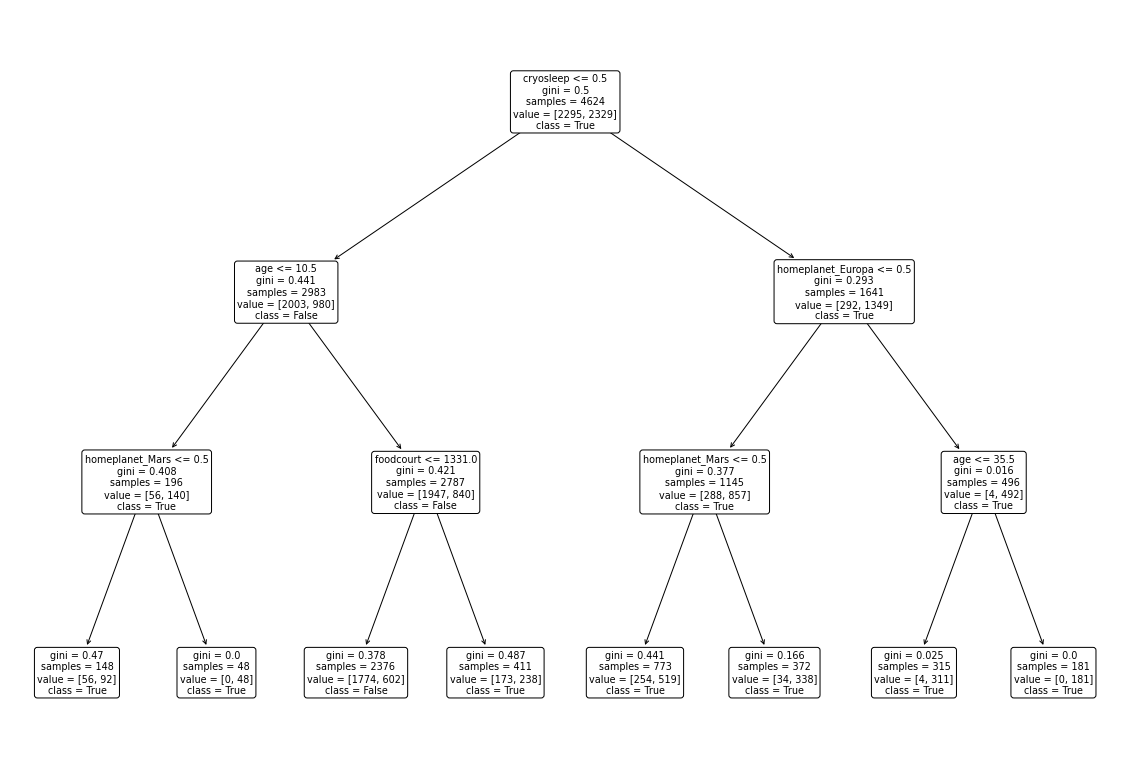

In [21]:
#Plot the tree
plt.figure(figsize=(20, 14))

plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

plt.show()

In [22]:
#Make predictions on validation set
val_preds = clf.predict(X_val)

In [23]:
#Generate classification report
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

       False       0.72      0.77      0.74       492
        True       0.76      0.71      0.73       499

    accuracy                           0.74       991
   macro avg       0.74      0.74      0.74       991
weighted avg       0.74      0.74      0.74       991



In [25]:
#Make deeper decision tree
seed = 42

big_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [26]:
#Fit to training data
big_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [27]:
#Calculate accuracy on train set. It's better, right?
big_clf.score(X_train, y_train)

0.8451557093425606

In [28]:
#Maybe not.. looks overfit to train data
big_clf.score(X_val, y_val)

0.751765893037336

## Random forest

Ensemble:  
A technique that combines many models to make predictions.

Bootstrapping:  
Random sampling of the train dataset and using different samples to train each tree.

Aggregation:  
The combination of predictions from all trees to make one final prediction.

Bagging:  
Technique that combines bootstrapping and aggregation.

In [29]:
#Import model
from sklearn.ensemble import RandomForestClassifier

In [30]:
#Initialize model
seed = 42

rf = RandomForestClassifier(max_depth=3, random_state=seed,
                            max_samples=0.5)

In [31]:
#Fit to train data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=42)

In [32]:
#Calculate accuracy on train set
rf.score(X_train, y_train)

0.7504325259515571

In [33]:
#Calculate accuracy on validation set
rf.score(X_val, y_val)

0.7346115035317861

In [34]:
#Return feature importances
rf.feature_importances_

array([3.23776000e-01, 1.98248168e-02, 2.05696355e-04, 1.29183022e-01,
       6.39690467e-02, 9.56128821e-02, 1.49352099e-01, 1.64574234e-01,
       3.96487884e-02, 1.03530149e-02, 8.52614517e-04, 2.64778448e-03])

In [35]:
#Same number of feature importances and columns..
X_train.columns

Index(['cryosleep', 'age', 'vip', 'roomservice', 'foodcourt', 'shoppingmall',
       'spa', 'vrdeck', 'homeplanet_Europa', 'homeplanet_Mars',
       'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [36]:
#Make dataframe from info
importance_df = pd.DataFrame({'feature': X_train.columns.tolist(),
              'importance': rf.feature_importances_})

In [37]:
#Sort the values to get most important features at top
importance_df.sort_values('importance', ascending=False)

,feature,importance
0,cryosleep,0.323776
7,vrdeck,0.164574
6,spa,0.149352
3,roomservice,0.129183
5,shoppingmall,0.095613
4,foodcourt,0.063969
8,homeplanet_Europa,0.039649
1,age,0.019825
9,homeplanet_Mars,0.010353
11,destination_TRAPPIST-1e,0.002648


In [38]:
#Maybe this is why vip's importance is so low?
X_train['vip'].value_counts()

False    4526
True       98
Name: vip, dtype: int64

In [40]:
#Create another model with different parameters
rf2 = RandomForestClassifier(n_estimators=200, max_depth=5,
                             random_state=seed, max_samples=0.33)

In [41]:
#Fit to train
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.33, n_estimators=200,
                       random_state=42)

In [42]:
#Train accuracy
rf2.score(X_train, y_train)

0.7993079584775087

In [43]:
#Validation accuracy
rf2.score(X_val, y_val)

0.7780020181634713

In [44]:
#Make predictions on train
train_preds = rf2.predict(X_train)

In [45]:
#Generate classification report
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80      2295
        True       0.82      0.78      0.80      2329

    accuracy                           0.80      4624
   macro avg       0.80      0.80      0.80      4624
weighted avg       0.80      0.80      0.80      4624



In [46]:
#Use loop to define many models and calculate their metrics
for i in range(3, 11):
    rf = RandomForestClassifier(max_depth=i, random_state=seed,
                                max_samples=0.5)
    rf.fit(X_train, y_train)
    
    train_acc = rf.score(X_train, y_train)
    
    val_acc = rf.score(X_val, y_val)
    
    print(f'Max depth of {i}. Train accuracy: {train_acc}. Validation accuracy: {val_acc}.')
    print()
    print('--------------------------------------------')
    print()

Max depth of 3. Train accuracy: 0.7504325259515571. Validation accuracy: 0.7346115035317861.

--------------------------------------------

Max depth of 4. Train accuracy: 0.7798442906574394. Validation accuracy: 0.7608476286579213.

--------------------------------------------

Max depth of 5. Train accuracy: 0.8016868512110726. Validation accuracy: 0.7669021190716448.

--------------------------------------------

Max depth of 6. Train accuracy: 0.8090397923875432. Validation accuracy: 0.7780020181634713.

--------------------------------------------

Max depth of 7. Train accuracy: 0.8233131487889274. Validation accuracy: 0.7830474268415741.

--------------------------------------------

Max depth of 8. Train accuracy: 0.8334775086505191. Validation accuracy: 0.786074672048436.

--------------------------------------------

Max depth of 9. Train accuracy: 0.8414792387543253. Validation accuracy: 0.7769929364278506.

--------------------------------------------

Max depth of 10. Trai

## KNN

Queries the "k" nearest neighbors to predict the label for a new datapoint.

In [49]:
#Import KNN model
from sklearn.neighbors import KNeighborsClassifier

In [50]:
#Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
#Fit to train
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
#Calculate accuracy on train set
knn.score(X_train, y_train)

0.8261245674740484

In [53]:
#Validation accuracy
knn.score(X_val, y_val)

0.763874873864783

In [54]:
#Use loop to train different models and collect information
num_neighbors = []
train_acc = []
val_acc = []

for i in range(1, 11, 2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    num_neighbors.append(i)
    
    train_acc.append(knn.score(X_train, y_train))
    
    val_acc.append(knn.score(X_val, y_val))

In [56]:
#Turn collected info into dataframe
knn_metrics = pd.DataFrame({'neighbors': num_neighbors,
              'train_acc': train_acc,
              'val_acc': val_acc})

knn_metrics

,neighbors,train_acc,val_acc
0,1,0.919118,0.721493
1,3,0.845804,0.743693
2,5,0.826125,0.763875
3,7,0.818555,0.773966
4,9,0.811419,0.765893


<AxesSubplot:xlabel='neighbors'>

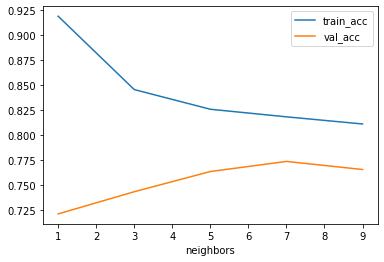

In [58]:
#Plot metrics
knn_metrics.plot(x='neighbors')